## 1---a). Model Comparison 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns # seaborn styles things nicely
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 2, 'font.size': 18, 
            'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 
            'xtick.labelsize': 12 })
sns.set_style('white')

import numpy as np
from scipy.stats import norm
from scipy.stats.distributions import poisson
[SpikeTimes1, SpikeCount1] = np.load('hw4problem1A.npy')

probability_G=[norm(10.2,np.sqrt(9.5)).pdf(i) for i in SpikeCount1]
probability_P=[poisson.pmf(l,9.8) for l in SpikeCount1]

likelihood_G=np.sum(np.log(probability_G))
likelihood_P=np.sum(np.log(probability_P))
    
print('for Gaussian process model, the ln of its likelihood is:%.5f'%likelihood_G)
print('for Poisson process model, the ln of its likelihood is:%.5f' %likelihood_P)

for Gaussian process model, the ln of its likelihood is:-25724.94959
for Poisson process model, the ln of its likelihood is:-25644.00969


#### Therefore, Poisson process model describe data better.

## b).Now split the data into training and validation sets

In [2]:
# split data into training and validation sets
training_sets=SpikeCount1[:5000]
validation_sets=SpikeCount1[5000:]

#Got the trained model parameter:
mean_data=np.mean(training_sets)
var_data=np.var(validation_sets)

#validation
probability_G=[norm(mean_data,np.sqrt(var_data)).pdf(i) for i in validation_sets]
probability_P=[poisson.pmf(l,mean_data/1) for l in validation_sets]

likelihood_G=np.sum(np.log(probability_G))
likelihood_P=np.sum(np.log(probability_P))
    
print('for Gaussian process model, the ln of its likelihood is:%.5f'%likelihood_G)
print('for Poisson process model, the ln of its likelihood is:%.5f' %likelihood_P)

for Gaussian process model, the ln of its likelihood is:-12808.68087
for Poisson process model, the ln of its likelihood is:-12775.92996


#### Therefore, after traning and validation, Poisson process model still describes data better.

## c). Point Processes

<Container object of 100 artists>

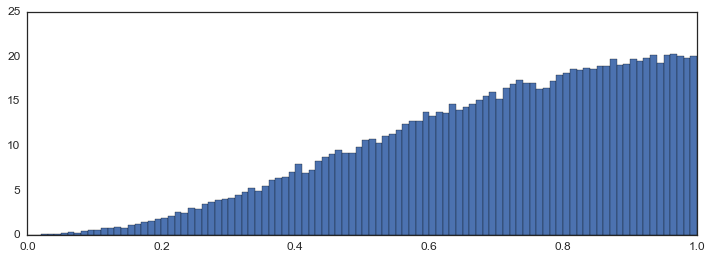

In [3]:
all_spiketime=np.array([])
for i in range(len(SpikeTimes1)):
    all_spiketime=np.append(all_spiketime,SpikeTimes1[i])
# generate PSTH(peri-stimulus time histogram) to show the average number of spikes in small bins of time
bin_size=0.01
bins=np.arange(0,1+bin_size,bin_size)
k0=[]
for l in range(len(bins)-1):
    K=0
    for i in range(len(all_spiketime)):
        if all_spiketime[i]>=bins[l] and all_spiketime[i]<bins[l+1]:
            K+=1
    k0.append(K)
k=[p/(np.size(SpikeTimes1)*bin_size) for p in k0]
bins=bins.tolist()
bins=bins[:-1]

plt.bar(left=bins,height=k,width=bin_size,align='edge')


####  With the PSTH diagram, we can see that there are more and more spikes occured in the late time of the experiment time limit(1 second), the later time, the more spikes occured. Therefore, it's clear that the firing rate over time is not constant, I would choose to use a time-varying rate over the 1 second window to model this neuron

## d). Fano Factor / ISI Distribution 

<Container object of 100 artists>

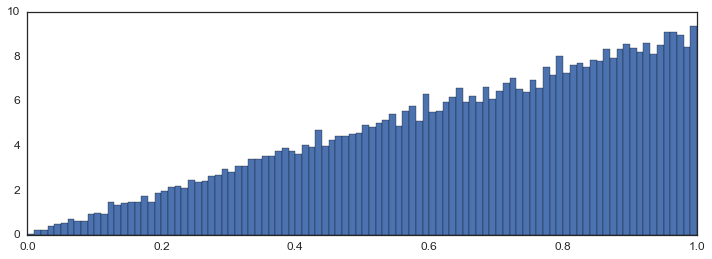

In [4]:
# import new data
[SpikeTimes2, SpikeCount2] = np.load('hw4problem1C.npy')

all_spiketime2=np.array([])
for i in range(len(SpikeTimes2)):
    all_spiketime2=np.append(all_spiketime2,SpikeTimes2[i])
# generate PSTH(peri-stimulus time histogram) to show the average number of spikes in small bins of time
bin_size=0.01
bins=np.arange(0,1+bin_size,bin_size)
k0=[]
for l in range(len(bins)-1):
    K=0
    for i in range(len(all_spiketime2)):
        if all_spiketime2[i]>=bins[l] and all_spiketime2[i]<bins[l+1]:
            K+=1
    k0.append(K)
k=[p/(np.size(SpikeTimes2)*bin_size) for p in k0]
bins=bins.tolist()
bins=bins[:-1]

plt.bar(left=bins,height=k,width=bin_size,align='edge')

####  Again, we can see that there are more and more spikes occured in the late time of the experiment time limit(1 second), the later time, the more spikes occured. Therefore, it's clear that the firing rate over time is not constant, I would choose to use a time-varying rate over the 1 second window to model this neuron

In [5]:
mean_spike=np.mean(SpikeCount2)
var_spike=np.var(SpikeCount2)
Fano_factor=var_spike/mean_spike
print('The Fano Factor of this neuron is: %.5f'%Fano_factor)

The Fano Factor of this neuron is: 0.87329


#### The Fano Factor for the standard Poisson process is 1, and the Fano Factor of this neuron is just 0.87329, smaller than the standard Poisson process one.

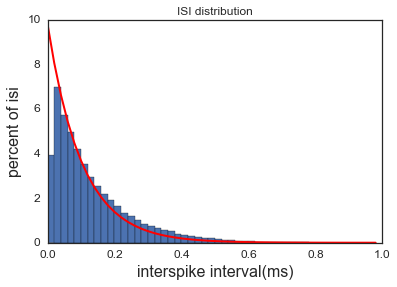

In [6]:
# generate ISI distribution of this neuron
sum_ISI=np.array([])
for i in range(len(SpikeTimes2)):
    sum_ISI=np.append(sum_ISI,np.diff(SpikeTimes2[i]))


%matplotlib inline
plt.title('ISI distribution')
n,bins,patches=plt.hist(sum_ISI,bins=np.arange(0,1,0.02),normed=True)
plt.xlabel('interspike interval(ms)')
plt.ylabel('percent of isi')

pdf=9.8*np.exp(-9.8*bins)  # expected pdf function

plt.plot(bins,pdf,'r')  #plot standard ISI exponential distribution

#### From the ISI distribution diagram, we can see that, at the very beginning of the ISI's, there is kind of 'missing', fewer ISI's than the normal standard Poisson process's ISI distribution. This probably due to the refractory period, also will leads to lower variance, and so smaller Fano Factor.

## 2---a).

In [7]:
import pandas as pd
[stimulus, spiketimes3] = np.load('hw4problem2.npy')

stimulus1=pd.DataFrame(stimulus,columns=['timestamps','direction'])
stimulus1['count']=0
for i in range(len(spiketimes3[9])):
    
    a=stimulus1[(stimulus1.timestamps<=(spiketimes3[9][i])) & (stimulus1.timestamps>=(spiketimes3[9][i]-5000))].index
    stimulus1.ix[a,'count']=1

spikes1=stimulus1.groupby('direction').sum()
spikes1

,timestamps,count
direction,,
0,2.354574e+12,507
20,2.370583e+12,132
40,2.346569e+12,107
60,2.398601e+12,87
80,2.378588e+12,123
100,2.218490e+12,309
120,2.242505e+12,736
140,2.278527e+12,1212
160,2.358576e+12,1153


In [8]:
spikes1['count']/=32
del spikes1['timestamps']
spikes1

,count
direction,
0,15.84375
20,4.12500
40,3.34375
60,2.71875
80,3.84375
100,9.65625
120,23.00000
140,37.87500
160,36.03125


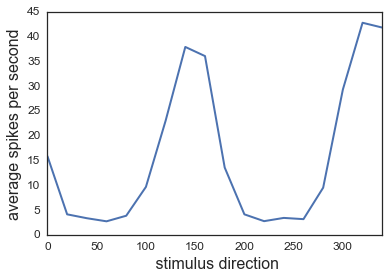

In [9]:

spikes1.plot(legend=None)
plt.xlabel(' stimulus direction')
plt.ylabel('average spikes per second')

#### So, there are kind of two “preferred direction”, 140 and 320 degree.
#### Since 320-140=180 degree, therefore, this neuron may just 'prefer' one specific line.

## b).

In [10]:
prefer_direction=[]
maximum_rate=[]
for l in range(10):
    stimulus1=pd.DataFrame(stimulus,columns=['timestamps','direction'])
    stimulus1['count']=0
    for i in range(len(spiketimes3[l])):
    
        a=stimulus1[(stimulus1.timestamps<=(spiketimes3[l][i])) & (stimulus1.timestamps>=(spiketimes3[l][i]-5000))].index
        stimulus1.ix[a,'count']=1

    spikes2=stimulus1.groupby('direction').sum()
    spikes2['count']/=32
    del spikes2['timestamps']

    max_spikes=spikes2.sort_values(by='count',ascending=False)
    prefer_direction.append(list(max_spikes.index)[0])
    maximum_rate.append(list(max_spikes['count'])[0])

[80, 100, 180, 320, 180, 260, 80, 80, 40, 320]


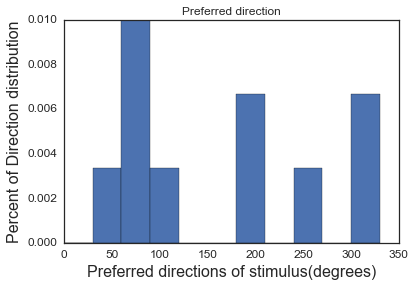

In [11]:
plt.title('Preferred direction')
n,bins,patches=plt.hist(prefer_direction,bins=np.arange(0,340,30),normed=True)
plt.xlabel('Preferred directions of stimulus(degrees)')
plt.ylabel('Percent of Direction distribution')
print(prefer_direction)

[13.5, 23.375, 21.96875, 12.1875, 14.0, 19.25, 27.71875, 3.78125, 5.125, 42.75]


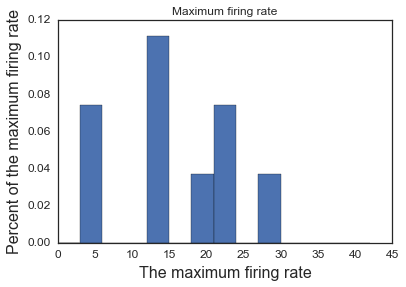

In [12]:
plt.title('Maximum firing rate')
n,bins,patches=plt.hist(maximum_rate,bins=np.arange(0,45,3),normed=True)
plt.xlabel('The maximum firing rate')
plt.ylabel('Percent of the maximum firing rate')
print(maximum_rate)

## C).

In [13]:
max_id=maximum_rate.index(max(maximum_rate))
stimulus1=pd.DataFrame(stimulus,columns=['timestamps','direction'])
stimulus1['count']=0
for i in range(len(spiketimes3[max_id])):
    
    a=stimulus1[(stimulus1.timestamps<=(spiketimes3[max_id][i])) & (stimulus1.timestamps>=(spiketimes3[max_id][i]-5000))].index
    stimulus1.ix[a,'count']=1

stimulus1=stimulus1.set_index(['direction'])
directions=sorted(list(set(stimulus1.index)))
mean_spikerate=[]
var_spikerate=[]
for l in range(len(directions)):
    s=stimulus1[stimulus1.index==directions[l]].sort_values(by='timestamps')
    times=np.array([])
    for i in range(8):
        times=np.append(times,(i+1)*np.ones(800))
    times=list(times)
    s['times']=times
    spikes3=s.groupby('times').sum()
    spikes3['count']/=4
    countspikes=list(spikes3['count'])
    mean_spikerate.append(np.mean(countspikes))
    var_spikerate.append(np.var(countspikes))

mean spiking rate: [15.84375, 4.125, 3.34375, 2.71875, 3.84375, 9.65625, 23.0, 37.875, 36.03125, 13.5625, 4.125, 2.75, 3.40625, 3.15625, 9.5, 29.28125, 42.75, 41.78125]

variance of spikes observed in one stimulus presentation: [32.8427734375, 1.515625, 2.8583984375, 2.9755859375, 1.0302734375, 30.2646484375, 87.90625, 29.40625, 88.3974609375, 14.05859375, 8.609375, 1.53125, 13.7333984375, 2.5771484375, 8.34375, 69.3349609375, 52.125, 91.7724609375]

Fano_factor for each stimulus direction: [2.0729166666666665, 0.36742424242424243, 0.85484813084112155, 1.0944683908045978, 0.26803861788617889, 3.1342030744336569, 3.8220108695652173, 0.77640264026402639, 2.4533553772766696, 1.036578341013825, 2.0871212121212119, 0.55681818181818177, 4.0318233944954125, 0.81652227722772275, 0.87828947368421051, 2.3678962113127002, 1.2192982456140351, 2.1964986910994764]


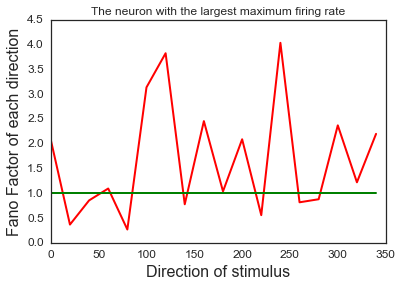

In [14]:
Fano_factor=np.divide(var_spikerate,mean_spikerate)
Fano_factor=list(Fano_factor)

%matplotlib inline
plt.plot(directions,Fano_factor,'r')
y=np.ones(len(directions))
plt.plot(directions,y,'g')
plt.title('The neuron with the largest maximum firing rate')
plt.xlabel('Direction of stimulus')
plt.ylabel('Fano Factor of each direction')

print('mean spiking rate: %a\n'%mean_spikerate)
print('variance of spikes observed in one stimulus presentation: %a\n'%var_spikerate)
print('Fano_factor for each stimulus direction: %a'%Fano_factor)

In [15]:
ave_firingrate=[]
for l in range(10):
    stimulus1=pd.DataFrame(stimulus,columns=['timestamps','direction'])
    stimulus1['count']=0
    for i in range(len(spiketimes3[l])):
    
        a=stimulus1[(stimulus1.timestamps<=(spiketimes3[l][i])) & (stimulus1.timestamps>=(spiketimes3[l][i]-5000))].index
        stimulus1.ix[a,'count']=1

    spikes4=stimulus1.groupby('direction').sum()
    spikes4['count']/=32
    del spikes4['timestamps']
    average_firingrate=np.mean(list(spikes4['count']))
    ave_firingrate.append(average_firingrate)

In [16]:
#find the neuron with the largest average firing rate.
max_ave_id=ave_firingrate.index(max(ave_firingrate))

# repeat
stimulus1=pd.DataFrame(stimulus,columns=['timestamps','direction'])
stimulus1['count']=0
for i in range(len(spiketimes3[max_ave_id])):
    
    a=stimulus1[(stimulus1.timestamps<=(spiketimes3[max_ave_id][i])) & (stimulus1.timestamps>=(spiketimes3[max_ave_id][i]-5000))].index
    stimulus1.ix[a,'count']=1

stimulus1=stimulus1.set_index(['direction'])
directions=sorted(list(set(stimulus1.index)))
mean_spikerate=[]
var_spikerate=[]
for l in range(len(directions)):
    s=stimulus1[stimulus1.index==directions[l]].sort_values(by='timestamps')
    times=np.array([])
    for i in range(8):
        times=np.append(times,(i+1)*np.ones(800))
    times=list(times)
    s['times']=times
    spikes3=s.groupby('times').sum()
    spikes3['count']/=4
    countspikes=list(spikes3['count'])
    mean_spikerate.append(np.mean(countspikes))
    var_spikerate.append(np.var(countspikes))

mean spiking rate: [15.9375, 18.53125, 19.65625, 21.375, 27.71875, 26.71875, 23.03125, 22.375, 15.96875, 12.9375, 12.875, 13.625, 14.5625, 17.90625, 21.5625, 21.96875, 17.0, 17.09375]

variance of spikes observed in one stimulus presentation: [20.82421875, 32.1474609375, 22.4521484375, 45.96875, 47.8974609375, 91.6787109375, 37.4443359375, 42.484375, 13.7568359375, 19.01171875, 32.265625, 29.40625, 10.63671875, 35.2177734375, 32.71484375, 40.0693359375, 25.34375, 34.5927734375]

Fano_factor for each stimulus direction: [1.3066176470588236, 1.7347702360876898, 1.1422396661367249, 2.1505847953216373, 1.7279805524239007, 3.4312499999999999, 1.6258056309362279, 1.8987430167597765, 0.86148483365949124, 1.4695048309178744, 2.5060679611650487, 2.1582568807339451, 0.7304184549356223, 1.9667866492146597, 1.5172101449275361, 1.8239242532005691, 1.4908088235294117, 2.0237088665447898]


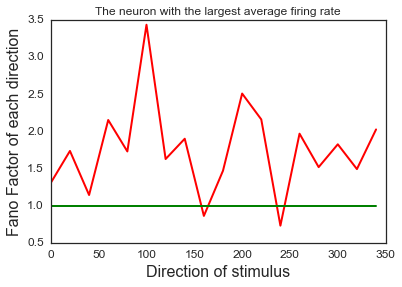

In [17]:
Fano_factor=np.divide(var_spikerate,mean_spikerate)
Fano_factor=list(Fano_factor)

%matplotlib inline
plt.plot(directions,Fano_factor,'r')
y=np.ones(len(directions))
plt.plot(directions,y,'g')
plt.title('The neuron with the largest average firing rate')
plt.xlabel('Direction of stimulus')
plt.ylabel('Fano Factor of each direction')

print('mean spiking rate: %a\n'%mean_spikerate)
print('variance of spikes observed in one stimulus presentation: %a\n'%var_spikerate)
print('Fano_factor for each stimulus direction: %a'%Fano_factor)

## d).

In [18]:
# For The neuron with the largest maximum firing rate

stimulus1=pd.DataFrame(stimulus,columns=['timestamps','direction'])
stimulus1['count']=0
for i in range(len(spiketimes3[max_id])):
    
    a=stimulus1[(stimulus1.timestamps<=(spiketimes3[max_id][i])) & (stimulus1.timestamps>=(spiketimes3[max_id][i]-5000))].index
    stimulus1.ix[a,'count']=1
    
spikes1=stimulus1.groupby('direction').sum()

# Get the prefered direction
prefer_d=list(spikes1[spikes1['count']==max(spikes1['count'])].index)
stimulus_preferd=stimulus1[stimulus1['direction']==prefer_d]
stimulus_preferd=stimulus_preferd.sort_values(by='timestamps')
# Get the ISI distribution under the prefered direction stimulus
c=list(stimulus_preferd.timestamps)
whole_ISI=np.array([])
for l in range(8):
    spike_times=[]
    for i in range(len(spiketimes3[max_id])):
        if (c[0+l*800]<=spiketimes3[max_id][i]) & (c[799+l*800]>=spiketimes3[max_id][i]):
            spike_times.append(spiketimes3[max_id][i])
    ISI_1=np.diff(spike_times)
    whole_ISI=np.append(whole_ISI,ISI_1)

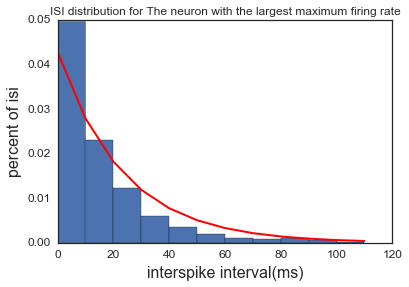

In [19]:
plt.title('ISI distribution for The neuron with the largest maximum firing rate')
n,bins,patches=plt.hist(whole_ISI/1000,bins=np.arange(0,120,10),normed=True)
plt.xlabel('interspike interval(ms)')
plt.ylabel('percent of isi')

rate=max(spikes1['count'])/32/1000
pdf=rate*np.exp(-rate*bins)  # expected pdf function

plt.plot(bins,pdf,'r')  #plot standard ISI exponential distribution

In [20]:
#For The neuron with the largest average firing rate

stimulus1=pd.DataFrame(stimulus,columns=['timestamps','direction'])
stimulus1['count']=0
for i in range(len(spiketimes3[max_ave_id])):
    
    a=stimulus1[(stimulus1.timestamps<=(spiketimes3[max_ave_id][i])) & (stimulus1.timestamps>=(spiketimes3[max_ave_id][i]-5000))].index
    stimulus1.ix[a,'count']=1
    
spikes1=stimulus1.groupby('direction').sum()

# Get the prefered direction
prefer_d=list(spikes1[spikes1['count']==max(spikes1['count'])].index)
stimulus_preferd=stimulus1[stimulus1['direction']==prefer_d]
stimulus_preferd=stimulus_preferd.sort_values(by='timestamps')
# Get the ISI distribution under the prefered direction stimulus
c=list(stimulus_preferd.timestamps)
whole_ISI=np.array([])
for l in range(8):
    spike_times=[]
    for i in range(len(spiketimes3[max_ave_id])):
        if (c[0+l*800]<=spiketimes3[max_ave_id][i]) & (c[799+l*800]>=spiketimes3[max_ave_id][i]):
            spike_times.append(spiketimes3[max_ave_id][i])
    ISI_1=np.diff(spike_times)
    whole_ISI=np.append(whole_ISI,ISI_1)

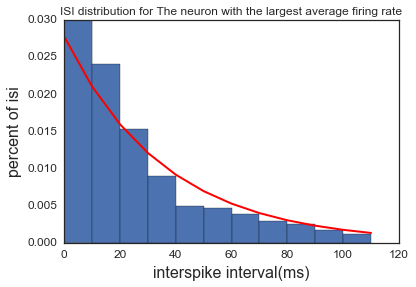

In [21]:
plt.title('ISI distribution for The neuron with the largest average firing rate')
n,bins,patches=plt.hist(whole_ISI/1000,bins=np.arange(0,120,10),normed=True)
plt.xlabel('interspike interval(ms)')
plt.ylabel('percent of isi')

rate=max(spikes1['count'])/32/1000
pdf=rate*np.exp(-rate*bins)  # expected pdf function

plt.plot(bins,pdf,'r')  #plot standard ISI exponential distribution

## e).

In [22]:
# For The neuron with the largest maximum firing rate

stimulus1=pd.DataFrame(stimulus,columns=['timestamps','direction'])
stimulus1['count']=0
for i in range(len(spiketimes3[max_id])):
    a=stimulus1[(stimulus1.timestamps<=(spiketimes3[max_id][i])) & (stimulus1.timestamps>=(spiketimes3[max_id][i]-5000))].index
    stimulus1.ix[a,'count']=1
    
spikes01=stimulus1.groupby('direction').sum()


# Rescaling time
inhomo_rate=list(spikes01['count']/32)
whole_uISI=np.array([])
for i in range(len(inhomo_rate)):
    T=32
    k=1
    utime=[]
    U=True
    u={}
    while U==True:
        u[0]=0
        tk=np.exp(k/1000000)
        u[k]=(tk/inhomo_rate[i])+u[k-1]
        if u[k] > T:
            break
        utime.append(u[k])
        k+=1
    u_ISI=np.diff(utime)
    whole_uISI=np.append(whole_uISI,u_ISI)

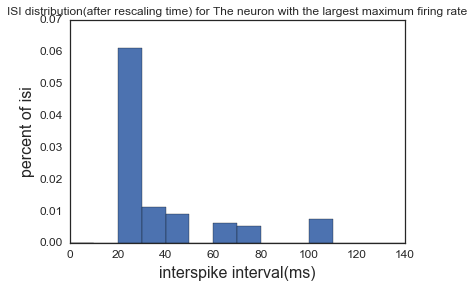

In [23]:
plt.title('ISI distribution(after rescaling time) for The neuron with the largest maximum firing rate')
n,bins,patches=plt.hist(whole_uISI*1000,bins=np.arange(0,150,10),normed=True)
plt.xlabel('interspike interval(ms)')
plt.ylabel('percent of isi')


In [24]:
from scipy import stats
stats.kstest(whole_uISI,'expon')


KstestResult(statistic=0.80563878301149927, pvalue=0.0)

#### According returned p-value,which near or equal to zero, reject the null hypothesis. So, for the neuron with the largest maximum firing rate, the piece-wise Poisson model isn't a good one.

In [26]:
# For The neuron with the largest average firing rate

stimulus1=pd.DataFrame(stimulus,columns=['timestamps','direction'])
stimulus1['count']=0
for i in range(len(spiketimes3[max_ave_id])):
    a=stimulus1[(stimulus1.timestamps<=(spiketimes3[max_ave_id][i])) & (stimulus1.timestamps>=(spiketimes3[max_ave_id][i]-5000))].index
    stimulus1.ix[a,'count']=1
    
spikes01=stimulus1.groupby('direction').sum()


# Rescaling time
inhomo_rate=list(spikes01['count']/32)
whole_uISI=np.array([])
for i in range(len(inhomo_rate)):
    T=32
    k=1
    utime=[]
    U=True
    u={}
    while U==True:
        u[0]=0
        tk=np.exp(k/1000000)
        u[k]=(tk/inhomo_rate[i])+u[k-1]
        if u[k] > T:
            break
        utime.append(u[k])
        k+=1
    u_ISI=np.diff(utime)
    whole_uISI=np.append(whole_uISI,u_ISI)

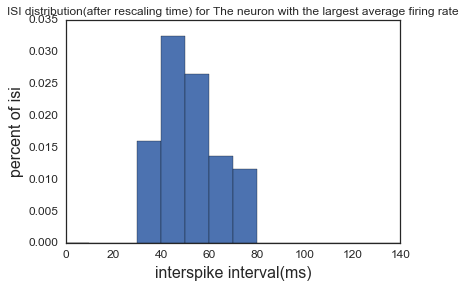

In [27]:
plt.title('ISI distribution(after rescaling time) for The neuron with the largest average firing rate')
n,bins,patches=plt.hist(whole_uISI*1000,bins=np.arange(0,150,10),normed=True)
plt.xlabel('interspike interval(ms)')
plt.ylabel('percent of isi')

In [28]:
from scipy import stats
stats.kstest(whole_uISI,'expon')


KstestResult(statistic=0.92524026263901737, pvalue=0.0)

#### According returned p-value,which near or equal to zero, reject the null hypothesis. So, for the neuron with the largest maximum firing rate, the piece-wise Poisson model isn't a good one.